## Random Forest

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv("credit_data.csv")
data

ApplicantID  Income   Debt CreditHistory  LoanAmount LoanStatus
0             1   45000  10000          Good       15000   Approved
1             2   28000   7000          Fair        8000   Approved
2             3   32000   5000     Excellent       10000   Approved
3             4   60000  20000          Good       25000   Rejected
4             5   52000  12000          Fair       18000   Approved
5             6   78000  15000     Excellent       30000   Approved
6             7   35000   9000          Good       12000   Approved
7             8   40000   8000          Fair       15000   Approved
8             9   22000   4000     Excellent        8000   Approved
9            10   85000  25000          Good       40000   Rejected
10           11   48000  18000          Fair       12000   Approved
11           12   62000  10000     Excellent       22000   Approved
12           13   38000  15000          Good       10000   Approved
13           14   55000   9000          Fair       20000   Approved
14           15   25000   6000     Excellent        7000   Approved
15           16   90000  30000          Good       45000   Approved
16           17   42000  11000          Fair       14000   Approved
17           18   39000   7000     Excellent       11000   Approved
18           19   20000   3000          Good        5000   Approved
19           20   72000  22000          Fair       32000   Rejected

In [21]:
encoder = LabelEncoder()
data["CreditHistory"] = encoder.fit_transform(data["CreditHistory"])
data

ApplicantID  Income   Debt  CreditHistory  LoanAmount LoanStatus
0             1   45000  10000              2       15000   Approved
1             2   28000   7000              1        8000   Approved
2             3   32000   5000              0       10000   Approved
3             4   60000  20000              2       25000   Rejected
4             5   52000  12000              1       18000   Approved
5             6   78000  15000              0       30000   Approved
6             7   35000   9000              2       12000   Approved
7             8   40000   8000              1       15000   Approved
8             9   22000   4000              0        8000   Approved
9            10   85000  25000              2       40000   Rejected
10           11   48000  18000              1       12000   Approved
11           12   62000  10000              0       22000   Approved
12           13   38000  15000              2       10000   Approved
13           14   55000   9000              1       20000   Approved
14           15   25000   6000              0        7000   Approved
15           16   90000  30000              2       45000   Approved
16           17   42000  11000              1       14000   Approved
17           18   39000   7000              0       11000   Approved
18           19   20000   3000              2        5000   Approved
19           20   72000  22000              1       32000   Rejected

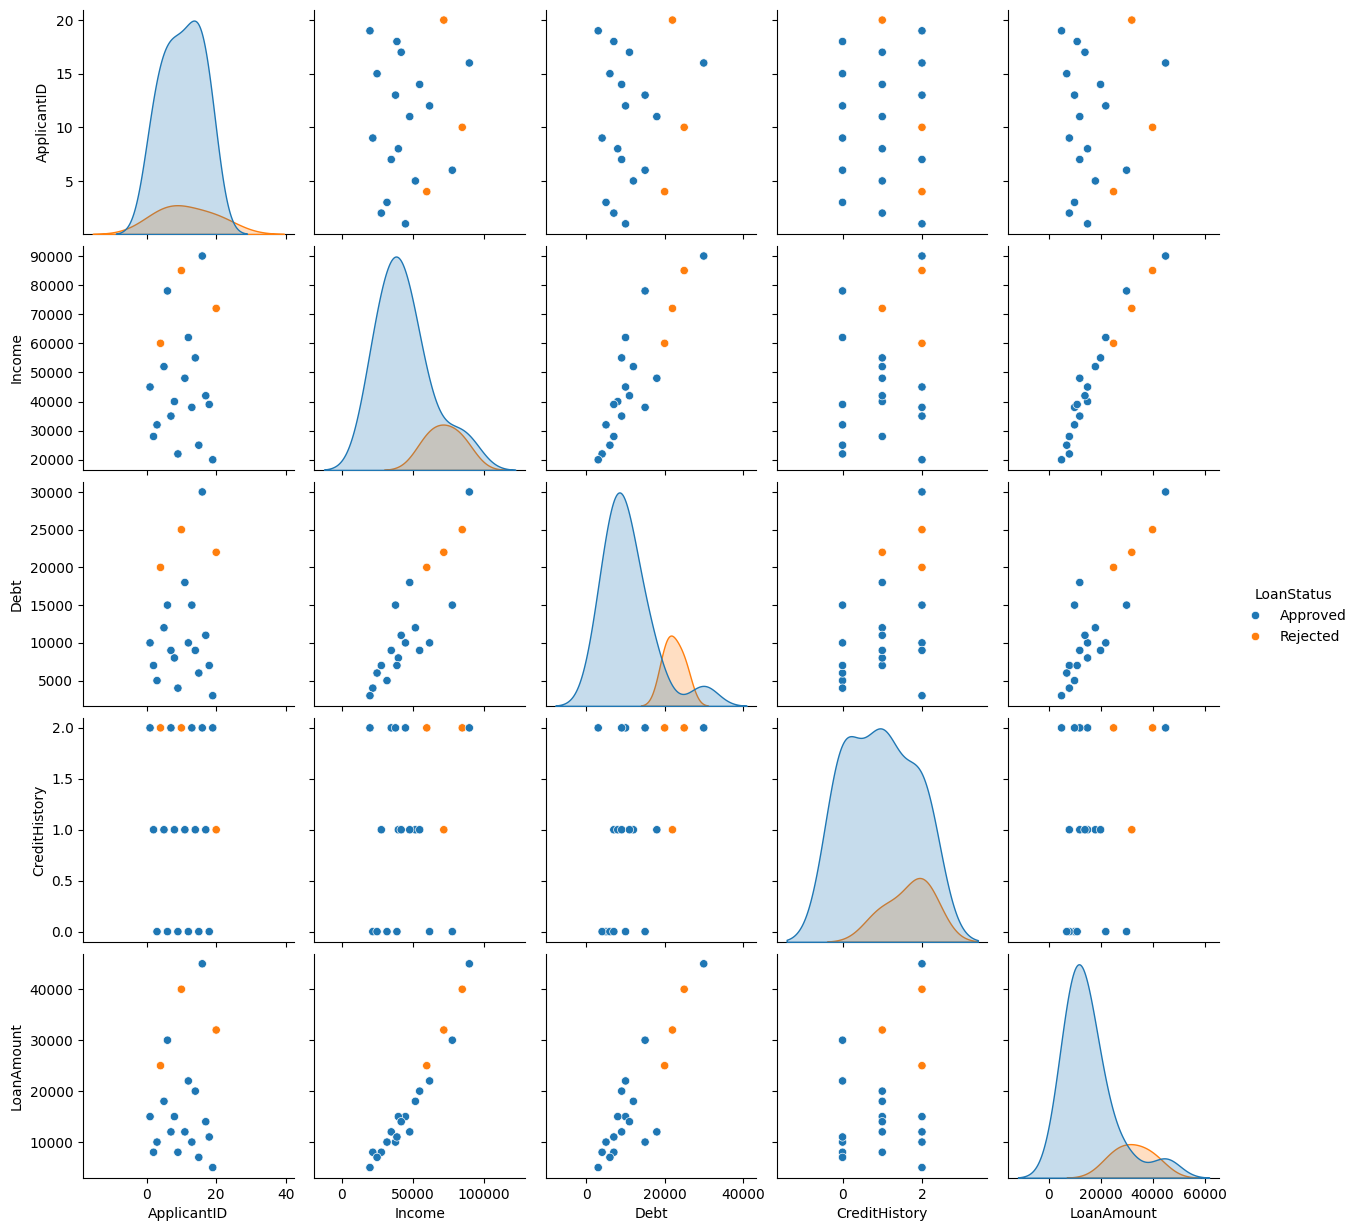

In [22]:
sns.pairplot(data=data, hue="LoanStatus")

In [23]:
# Feature selection (choose relevant features for credit scoring)
features = ["Income", "Debt", "CreditHistory", "LoanAmount"]
X = data[features]  
y = data["LoanStatus"]  # Target variable (e.g., approved/rejected)

In [24]:
X

Income   Debt  CreditHistory  LoanAmount
0    45000  10000              2       15000
1    28000   7000              1        8000
2    32000   5000              0       10000
3    60000  20000              2       25000
4    52000  12000              1       18000
5    78000  15000              0       30000
6    35000   9000              2       12000
7    40000   8000              1       15000
8    22000   4000              0        8000
9    85000  25000              2       40000
10   48000  18000              1       12000
11   62000  10000              0       22000
12   38000  15000              2       10000
13   55000   9000              1       20000
14   25000   6000              0        7000
15   90000  30000              2       45000
16   42000  11000              1       14000
17   39000   7000              0       11000
18   20000   3000              2        5000
19   72000  22000              1       32000

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [28]:
X_test

Income   Debt  CreditHistory  LoanAmount
0    45000  10000              2       15000
17   39000   7000              0       11000
15   90000  30000              2       45000
1    28000   7000              1        8000

In [29]:
y_pred

array(['Approved', 'Approved', 'Rejected', 'Approved'], dtype=object)

In [30]:
y_test

0     Approved
17    Approved
15    Approved
1     Approved
Name: LoanStatus, dtype: object

In [31]:
y_test

0     Approved
17    Approved
15    Approved
1     Approved
Name: LoanStatus, dtype: object

In [32]:
y_pred

array(['Approved', 'Approved', 'Rejected', 'Approved'], dtype=object)

In [33]:
# Evaluate model performance (e.g., accuracy, confusion matrix)
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)



Accuracy: 0.75
Confusion Matrix:
 [[3 1]
 [0 0]]


In [34]:
# # พิมพ์ค่า feature importance
print("Feature importance:", model.feature_importances_)

Feature importance: [0.21412037 0.54652778 0.02622609 0.21312576]


In [35]:
# Apply the model to a new applicant (replace with applicant data)
new_applicant = pd.DataFrame({
    "Income": 30000,
    "Debt": 20000,
    "CreditHistory": "Good",  # Categorical data needs encoding
    "LoanAmount": 1000
}, index=[0])

In [36]:

# Encode categorical data (if applicable)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
new_applicant["CreditHistory"] = encoder.fit_transform(new_applicant["CreditHistory"])

print(new_applicant)

# Get prediction for the new applicant
prediction = model.predict(new_applicant)[0]

print(prediction)


   Income   Debt  CreditHistory  LoanAmount
0   30000  20000              0        1000
Approved
